In [17]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Loading dataset
df = pd.read_csv('/content/drive/My Drive/books.csv', quoting=3, on_bad_lines='skip') # Upload the CSV file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Preview the data
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [11]:
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [ ]:
tick_positions = np.arange(1, 5.5, 0.5)  # [1.0, 1.5, ..., 5.0]

# Create labels for all, but only name some — others are blank
tick_labels = ['' for _ in tick_positions]
label_map = {4.0: 'Low', 4.5: 'Meh', 5.0: 'Perfect'}

# Fill in custom labels where applicable
for i, val in enumerate(tick_positions):
    if val in label_map:
        tick_labels[i] = label_map[val]

plt.xticks(tick_positions, tick_labels)


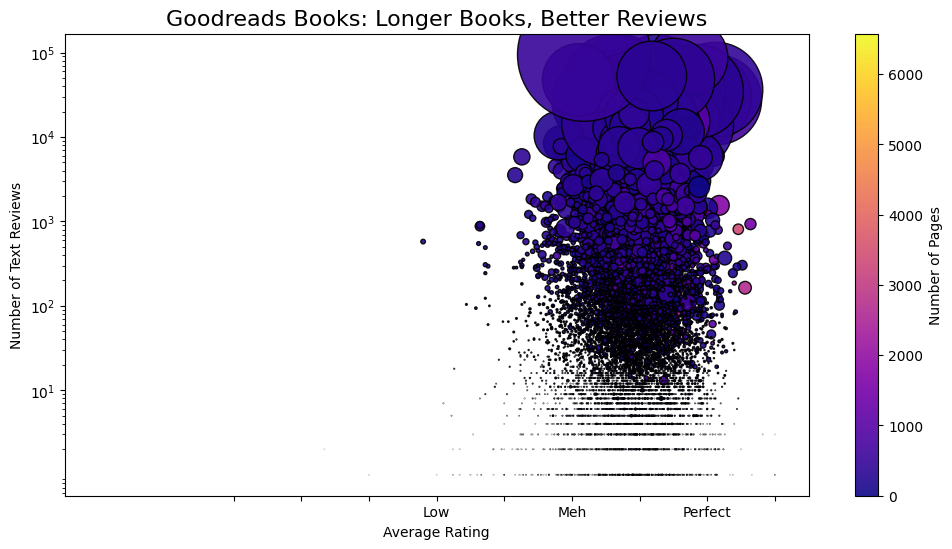

In [22]:
plt.figure(figsize=(12, 6))

plt.scatter(
    df['average_rating'],
    df['text_reviews_count'],
    s=df['ratings_count'] / 500,   # Smaller bubbles
    c=df['  num_pages'],
    cmap='plasma',
    alpha=0.9,
    edgecolors='black'
)

tick_positions = np.arange(1, 5.5, 0.5)  # [1.0, 1.5, ..., 5.0]

# Create labels for all, but only name some — others are blank
tick_labels = ['' for _ in tick_positions]
label_map = {4.0: 'Low', 4.5: 'Meh', 5.0: 'Perfect'}

# Fill in custom labels where applicable
for i, val in enumerate(tick_positions):
    if val in label_map:
        tick_labels[i] = label_map[val]

plt.title("Goodreads Books: Longer Books, Better Reviews", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Number of Text Reviews")

plt.yscale('log')  # Makes all bubbles more visible
#plt.xticks([4, 4.5, 5], labels=['Low', 'Meh', 'Perfect'])
plt.xticks(np.arange(1, 5.5, 0.5), labels=['', '', '', 'Low', '', 'Meh', '', 'Perfect', ''])
plt.yticks([10, 100, 1000, 10000, 100000])  # Partial ticks for context

plt.grid(False)
plt.colorbar(label="Number of Pages")

plt.show()